# Comparaison des résultats au nombre de pixels

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from dataprocess import DataLoader, Blurr, Add_noise
from estimator import Estimator
from posttreat import Display
from posttreat import Error_Display
import os
from PIL import Image
from scipy import signal
from scipy import interpolate

In [10]:
# Kernel Definition
M         = 20
Mx, My    = np.meshgrid(np.linspace(-1,1,2*M), np.linspace(-1,1,2*M))
d         = np.sqrt(Mx*Mx+My*My)
sigma, mu = 0.1, 0.0
K         = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
K         = K/K.sum()

## Definition de l'expérimentation
On coupe une image au nombre de pixels défini et on reconstruit le noyau de convolution associé au problème inverse pour ce nombre de pixel.
On trace ensuite les courbes d'erreurs (du noyau et de l'image refloutée) en fonction du nombre de pixels.

In [11]:
# Number of tested samples
nsamples  = 20

In [12]:
def Experimentation(nsamples,x_i,K):
    # Image cropping size
    Nx,Ny     = x_i.shape
    q   = (Nx-10*M)//nsamples
    nnx = np.arange(4*M,Nx,q)
    p   = (Ny-10*M)//nsamples
    nny = np.arange(4*M,Ny,p)
    # Initialisation
    shape   = np.zeros(nsamples) # taille en pixels
    loss_K  = np.zeros(nsamples) # erreur normalisée sur K
    loss_im = np.zeros(nsamples) # erreur normalisée sur l'image convoluée
    #
    for i in range(nsamples):
        # Select size
        nx, ny  = nnx[i], nny[i]
        # Crop image
        x_in    = x_i[:nx,:ny]
        # Blur image
        x_b     = Blurr(x_in,K)
        x_out   = Add_noise(x_b)
        # Reconstruct kernel
        alpha   = 100
        mu      = 1
        K_alpha = Estimator(M,x_in,x_out,alpha,mu,niter = 500)
        # Compute error
        #on Kernel
        norm_K  = np.linalg.norm(K)
        error_K = np.linalg.norm(K-K_alpha)/norm_K
        #on image
        x_b_alpha = Blurr(x_in,K_alpha)
        norm_im   = np.linalg.norm(x_in)
        error_im  = np.linalg.norm(x_b_alpha-x_b)/norm_im
        # Display result
        if i%5 == 0:
            Error_Display(x_in, K, K_alpha)
        # Save loss
        shape[i]   = nx*ny
        loss_K[i]  = error_K
        loss_im[i] = error_im
        #
    return shape, loss_K, loss_im

## Expérience 1

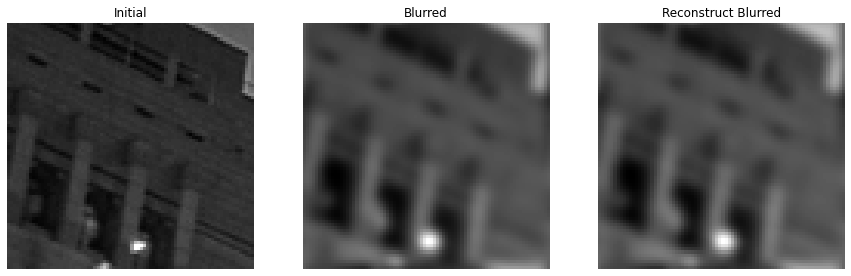

Erreur totale :
0.012448460075580018


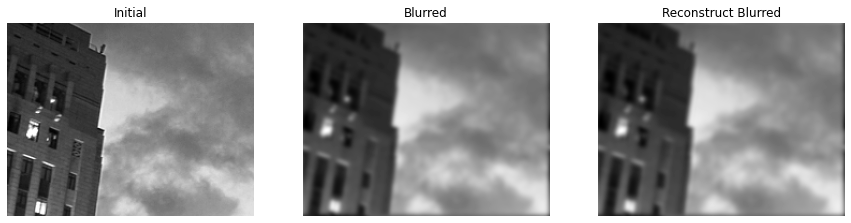

Erreur totale :
0.0048320564225230855


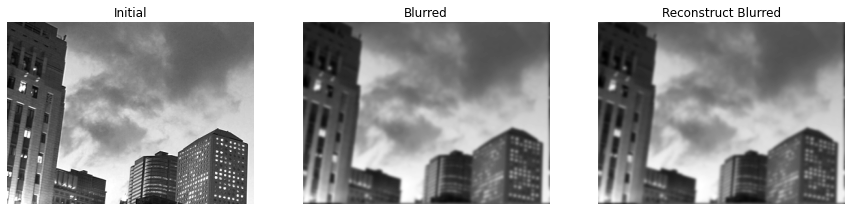

Erreur totale :
0.003009475552696655


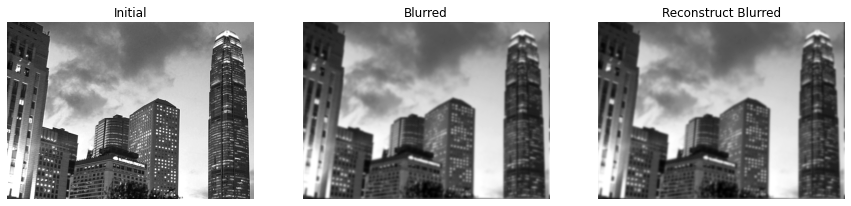

Erreur totale :
0.0026052349422850483


In [5]:
file_name = 'Images'
im_name   = 'image01.png'
x_i       = DataLoader(file_name,im_name)
shape0, loss_K0, loss_im0 = Experimentation(nsamples,x_i,K)

## Expérience 2

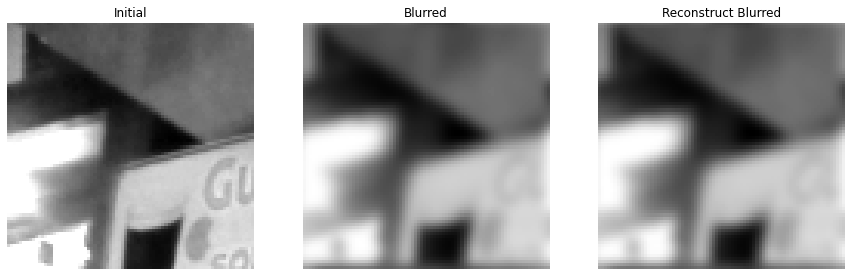

Erreur totale :
0.0044232652902867296


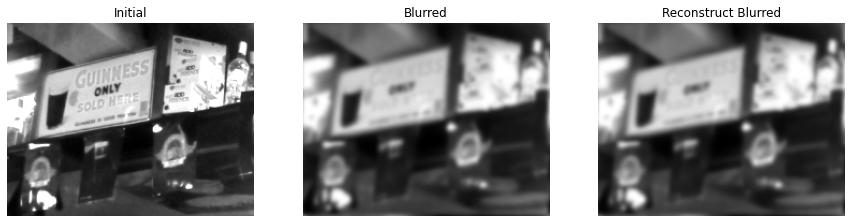

Erreur totale :
0.002761158948407107


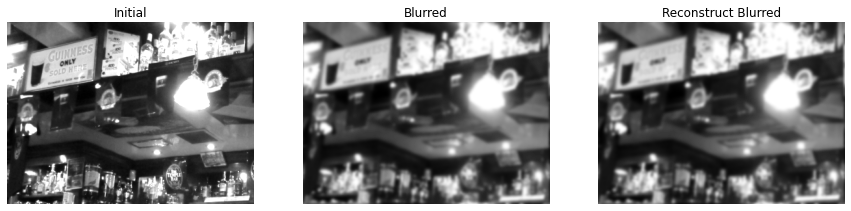

Erreur totale :
0.0023493577491684294


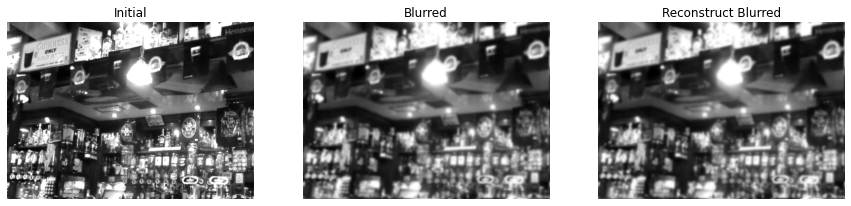

Erreur totale :
0.00232280355364015


In [6]:
im_name   = 'image07.png'
x_i       = DataLoader(file_name,im_name)
shape1, loss_K1, loss_im1 = Experimentation(nsamples,x_i,K)

## Expérience 3

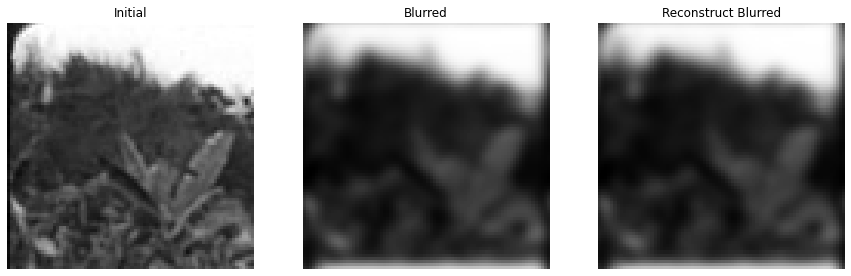

Erreur totale :
0.005379247503645842


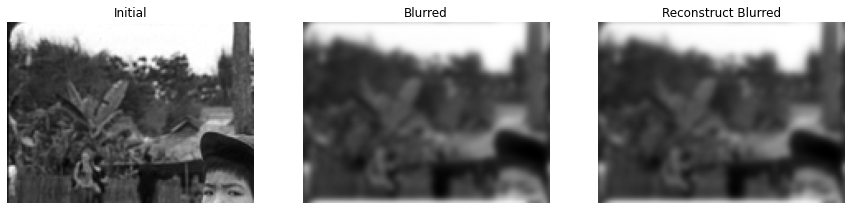

Erreur totale :
0.004210395927679963


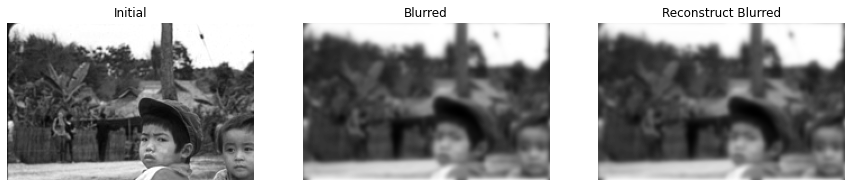

Erreur totale :
0.002840905298547261


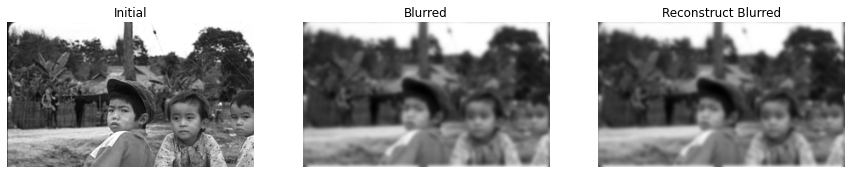

Erreur totale :
0.003376118815254805


In [7]:
im_name   = 'image05.jpg'
x_i       = DataLoader(file_name,im_name)
shape2, loss_K2, loss_im2 = Experimentation(nsamples,x_i,K)

## Conclusion

Text(0.5, 0, 'number of pixels')

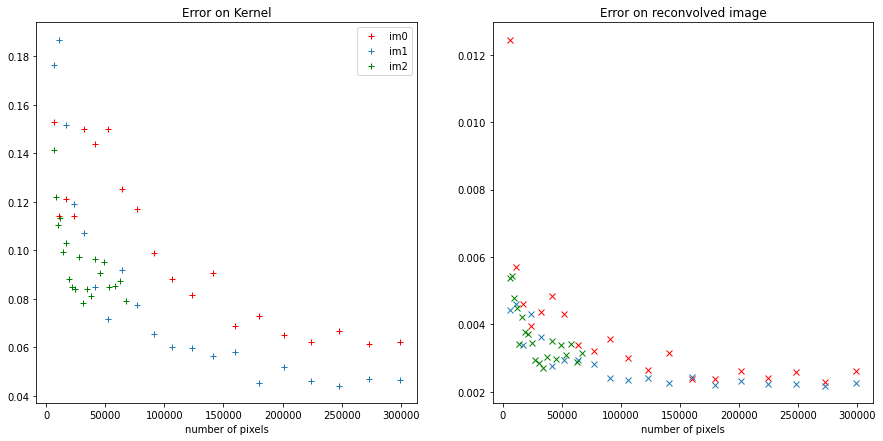

In [8]:
# plot
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,7))
ax0.plot(shape0,loss_K0,'r+',label ="im0")
ax0.plot(shape1,loss_K1, '+',label ="im1")
ax0.plot(shape2,loss_K2,'g+',label ="im2")
ax0.set_title("Error on Kernel")
ax0.set_xlabel("number of pixels")
ax0.legend()
ax1.plot(shape0,loss_im0,'rx')
ax1.plot(shape1,loss_im1, 'x')
ax1.plot(shape2,loss_im2,'gx')
ax1.set_title("Error on reconvolved image")
ax1.set_xlabel("number of pixels")